Last time we looked into linear and cubic interpolation. To sum up what happened,
given a set of data points, we plotted them as usual. First, we found unique linear 
functions between individual points. To further approximate data inbetween our
measured points, we moved to cubic functions bewteen points. 

Now, we'll utilize Lagrange Polynomials to appoximate polynomials of some degree 
between points. They may be linear, quadratic, cubic or quintic.

In [107]:
#import the good stuff
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import sympy as sy

First we'll need to find the coefficients of the terms of our Lagrange Polynomials.
So, we can write a program to do exactly that. Consider the given data points. 

In [108]:
#data points
a = [1, 2, 3]
b = [3, 1, 2]
#declare and solving for coefficients
cf = list()
x, y = sy.symbols('x y')
#our coefficient polynomials
#for 3 data points we only have 2 multiplcations
#this can be extended for more than 3 data points of course
p_1 = ((x-a[1])*(x-a[2]))/((a[0]-a[1])*(a[0]-a[2]))
p_1 = str(sy.expand(p_1))
print(p_1)

p_2 = ((x-a[0])*(x-a[2]))/((a[1]-a[0])*(a[1]-a[2]))
p_2 = str(sy.expand(p_2))
print(p_2)

p_3 = ((x-a[0])*(x-a[1]))/((a[2]-a[0])*(a[2]-a[1]))
p_3 = str(sy.expand(p_3))
print(p_3)

x**2/2 - 5*x/2 + 3
-x**2 + 4*x - 3
x**2/2 - 3*x/2 + 1


We have our coefficients which we'll store into another list and use in a NumPy
function to generate our individual functions.

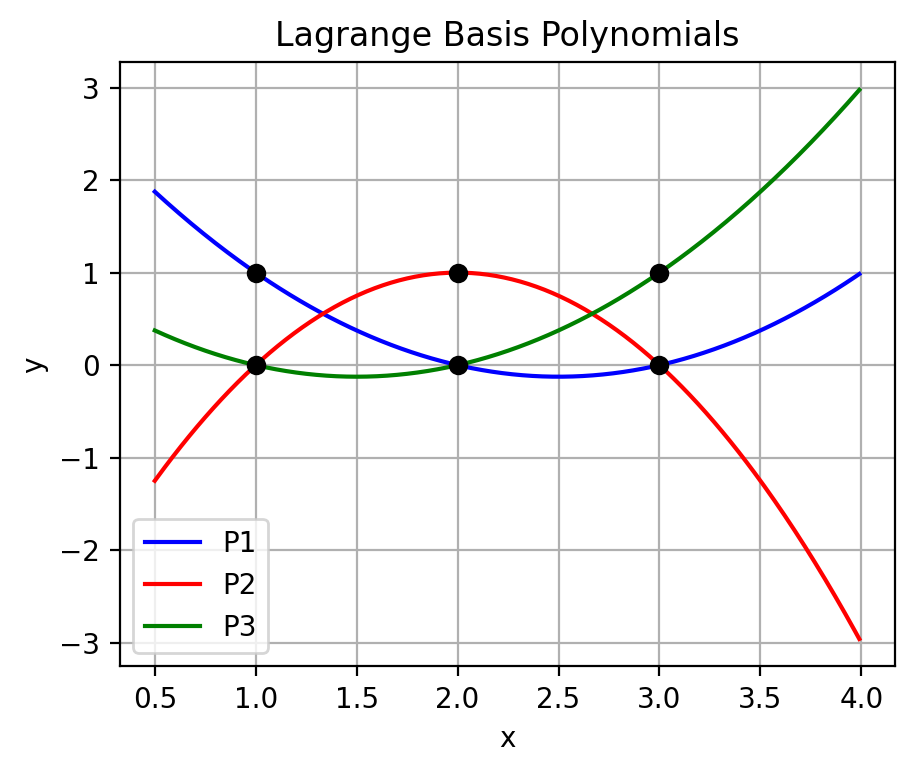

In [109]:
#we order the coefficients from the lowest to the highest degree
P1 = [3, -2.5, 0.5]
P2 = [-3, 4, -1]
P3 = [1, -1.5, 0.5]
#use numpy to get polynomial functions
p1 = poly.Polynomial(P1)
p2 = poly.Polynomial(P2)
p3 = poly.Polynomial(P3)
#new domain axis for precision plotting
xn = np.arange(0.5, 4, 0.01)

fig = plt.figure(figsize = (5,4),dpi=200)
plt.plot(xn, p1(xn), 'b', label = 'P1')
plt.plot(xn, p2(xn), 'r', label = 'P2')
plt.plot(xn, p3(xn), 'g', label = 'P3')

plt.plot(a, np.ones(len(a)), 'ko', a, np.zeros(len(a)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

These are the basis polynomials for which our Lagrange Polynomial will be a linear combination of. Now
we only have left to add these functions together to get one smooth curve.

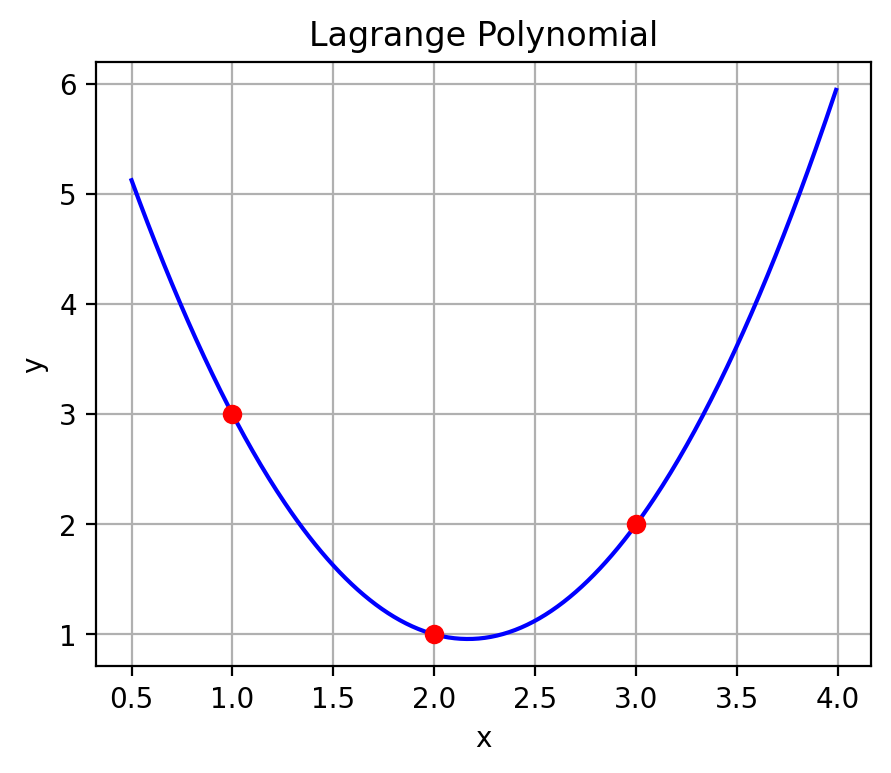

In [110]:
#we use the coefficients as the data points of our dependent variable
L = 3*p1 + p2 + 2*p3

fig = plt.figure(figsize = (5,4),dpi=200)
plt.plot(xn, L(xn), 'b', a, b, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Now, instead of doing this the hard way every time, SciPy has this process integrated
which can execute immediately. We only have to make use of our new domain. We should get
the exact same graph. Let's try it.

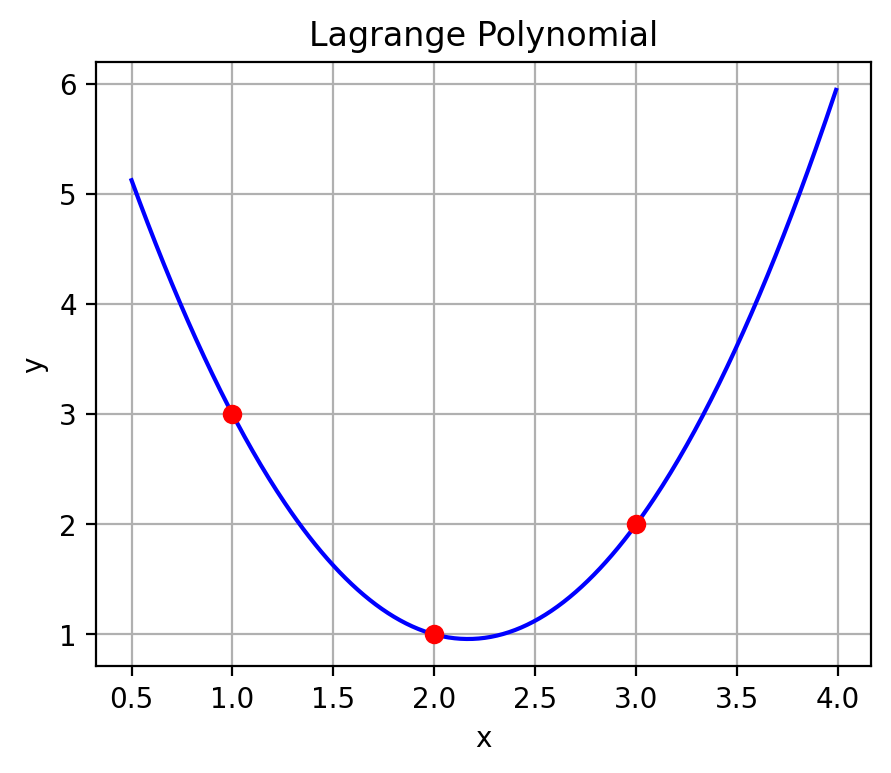

In [111]:
from scipy.interpolate import lagrange

f = lagrange(a,b)

fig = plt.figure(figsize = (5,4),dpi=200)
plt.plot(xn, f(xn), 'b', a, b, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()